# 의사결정트리

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier,plot_tree

titanic_df = pd.read_csv('C:/Users/82104/Desktop/스파르타_데이터부트캠프/VSCODE/titanic/train.csv',encoding='utf-8')

[Text(0.5, 0.75, 'Sex <= 0.5\ngini = 0.473\nsamples = 891\nvalue = [549, 342]\nclass = Not Survived'),
 Text(0.25, 0.25, 'gini = 0.383\nsamples = 314\nvalue = [81, 233]\nclass = Survived'),
 Text(0.75, 0.25, 'gini = 0.306\nsamples = 577\nvalue = [468, 109]\nclass = Not Survived')]

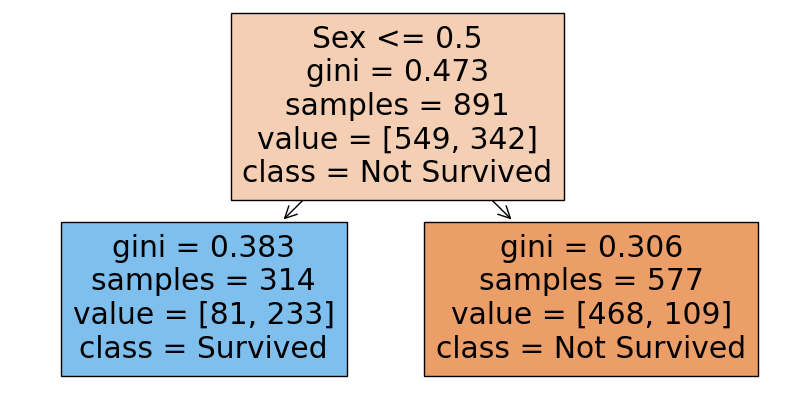

In [3]:
X_features = ['Pclass','Sex','Age']

#전처리
le = LabelEncoder()
titanic_df['Sex'] = le.fit_transform(titanic_df['Sex'])

le2 = LabelEncoder()
titanic_df['Pclass'] = le2.fit_transform(titanic_df['Pclass'])

Age_mean = titanic_df['Age'].mean()
titanic_df['Age'] = titanic_df['Age'].fillna(Age_mean)

X = titanic_df[X_features]
y = titanic_df['Survived']


#의사결정 트리 모델
model_dt = DecisionTreeClassifier(max_depth= 1)
model_dt.fit(X,y)

plt.figure(figsize=(10,5))
plot_tree(model_dt,feature_names=X_features,class_names=['Not Survived','Survived'],filled= True)

# 랜덤포레스트

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,f1_score

model_lor = LogisticRegression()
model_dt = DecisionTreeClassifier(random_state= 42)
moder_rf = RandomForestClassifier(random_state= 42)

model_lor.fit(X,y)
model_dt.fit(X,y)
moder_rf.fit(X,y)

y_lor_pred = model_lor.predict(X)
y_dt_pred = model_dt.predict(X)
y_rf_pred = moder_rf.predict(X)

#평가
def get_score(model_name,y_ture,y_pred):
    acc = accuracy_score(y_ture,y_pred).round(2)
    f1 = f1_score(y_ture,y_pred).round(2)

    print(model_name, 'acc:',acc,'f1_score:',f1)

print(get_score('lor',y,y_lor_pred))
print(get_score('dt',y,y_dt_pred))
print(get_score('rf',y,y_rf_pred))

lor acc: 0.8 f1_score: 0.73
None
dt acc: 0.88 f1_score: 0.83
None
rf acc: 0.88 f1_score: 0.84
None


# 최근접 이웃 KNN 과 부스팅 이론
- install xgboost, lightgbm

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

model_knn = KNeighborsClassifier()
model_gbm = GradientBoostingClassifier(random_state=42)
model_xgb = XGBClassifier(random_state=42)
model_lgb = LGBMClassifier(random_state=42)

model_knn.fit(X,y)
model_gbm.fit(X,y)
model_xgb.fit(X,y)
model_lgb.fit(X,y)

y_knn_pred = model_knn.predict(X)
y_gbm_pred = model_gbm.predict(X)
y_xgb_pred = model_xgb.predict(X)
y_lgb_pred = model_lgb.predict(X)

print(get_score('lor',y,y_lor_pred))
print(get_score('dt',y,y_dt_pred))
print(get_score('rf',y,y_rf_pred))
print(get_score('knn',y,y_knn_pred))
print(get_score('gbm',y,y_gbm_pred))
print(get_score('xgb',y,y_xgb_pred))
print(get_score('lgb',y,y_lgb_pred))